In [1]:
import emby
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time

SKlearn Digits
---

Time to fit transform 0.414412736892700279538694  -- time:  0.013489007949829102         


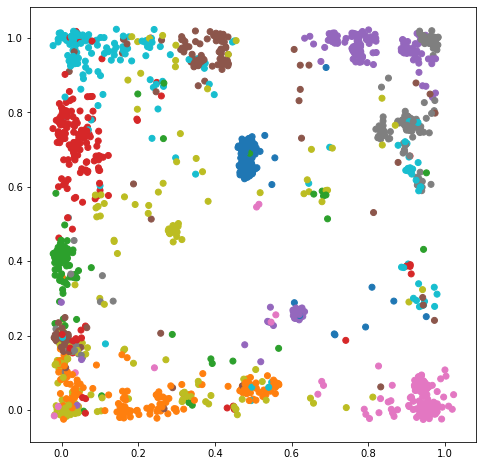

CPU times: user 640 ms, sys: 216 ms, total: 856 ms
Wall time: 690 ms


In [19]:
%%time
from sklearn.datasets import load_digits

digits = load_digits()

x = digits.data
y = digits.target

x = x - x.mean()

som = emby.SOM(Z=2, 
               learning_rate=0.1,
               y_variance=0.2, 
               bases=1000, 
               logging=emby.Logging.Progress, 
               device=emby.Device.GPU,
               uniform_base_position="random")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()


Found 1 CUDA devices
id 0    b'GeForce GTX 1080 Ti'                              [SUPPORTED]
                      compute capability: 6.1
                           pci device id: 0
                              pci bus id: 1
Summary:
	1/1 devices are supported
Device GPU
Fitted done/  500 -- movement:  0.6448277221108882  -- time:  1.7591149806976318         


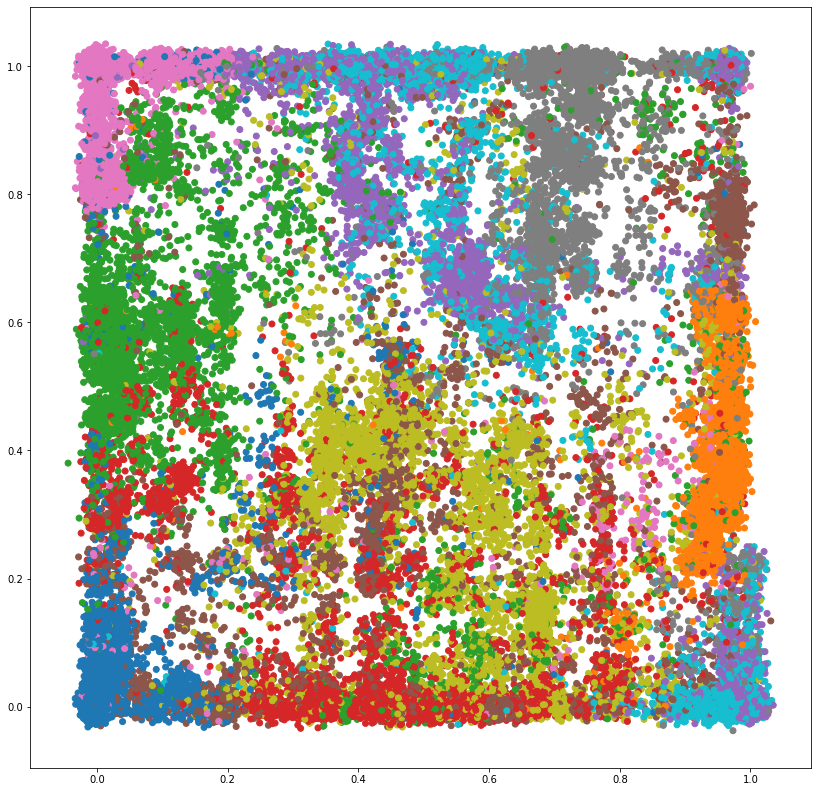

In [3]:
import tensorflow_datasets as tfds

mnist = tfds.load(name="mnist")["train"]
mnist_data = []
mnist_labels = []
for sample in tfds.as_numpy(mnist):
    image = sample["image"]
    label = sample["label"]

    mnist_data.append(image.reshape(-1) / 256)
    mnist_labels.append(label)

x, y = np.array(mnist_data), np.array(mnist_labels)

x = x - x.mean()

som = emby.SOM(Z=2, 
               bases=1000, 
               epochs=500,
               learning_rate=0.1,
               y_variance=0.15,
               logging=emby.Logging.Everything,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print("Fitted done")

plt.figure(figsize=(14, 14))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()
